In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import random
import time 
import datetime as dt 
# Summer2024-env/Scripts/activate

In [2]:
import seaborn as sns


In [3]:
t = pd.read_csv("newWeatherData.csv")

In [4]:
t = t[5:len(t)-20]

In [5]:
t[:739].iloc[5]['time'].split("T")[1].split(":")[0]

'10'

In [6]:
t

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
5,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515
6,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510
7,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507
8,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505
9,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,2024-06-30T23:00,35.8,39,39.0,0.0,0.0,0.0,0.0,1016.2,1002.6,5,3.3,354,14.4,34.9,0.282
30648,2024-07-01T00:00,35.1,41,38.6,0.0,0.0,0.0,0.0,1016.2,1002.6,5,2.3,39,10.4,34.5,0.282
30649,2024-07-01T01:00,31.5,65,36.8,0.0,0.0,0.0,0.0,1017.7,1003.9,34,5.4,82,13.3,33.1,0.295
30650,2024-07-01T02:00,30.4,69,35.6,0.0,0.0,0.0,0.0,1018.0,1004.1,32,6.6,103,10.4,32.0,0.295


In [7]:
def addWeatherHourColumn(data : pd.DataFrame) -> pd.DataFrame:

    data = data.reset_index(drop=True)

    data["hourTime"] = "0"

    # use datetime module 
    for index, row in data.iterrows():
        AMPM = "AM"
        hour = int(row['time'].split("T")[1].split(":")[0])

        if hour >12:
            AMPM = "PM"
            hour -=12
        
        # Note that there is no hour 24. After hour 23, it goes back to hour 0
        if hour == 12:
            AMPM = "PM"
        
        # 0 represents 12AM
        if hour == 0:
            hour = 12
            AMPM = "AM"


        data.loc[index,'hourTime'] = str(hour) + str(AMPM)

    return data

In [8]:
t

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
5,2021-01-01T05:00,9.0,99,6.5,0.4,0.4,0.0,0.0,1002.4,987.7,90,15.3,139,29.9,7.6,0.515
6,2021-01-01T06:00,8.6,97,5.1,0.0,0.0,0.0,0.0,1002.8,988.1,90,20.5,181,41.0,8.3,0.510
7,2021-01-01T07:00,6.2,95,2.1,0.0,0.0,0.0,0.0,1003.8,989.0,90,20.5,195,42.5,7.9,0.507
8,2021-01-01T08:00,5.5,94,1.4,0.0,0.0,0.0,0.0,1004.4,989.5,91,18.7,205,40.3,7.4,0.505
9,2021-01-01T09:00,4.9,92,0.7,0.0,0.0,0.0,0.0,1005.3,990.4,90,18.9,198,38.9,7.0,0.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,2024-06-30T23:00,35.8,39,39.0,0.0,0.0,0.0,0.0,1016.2,1002.6,5,3.3,354,14.4,34.9,0.282
30648,2024-07-01T00:00,35.1,41,38.6,0.0,0.0,0.0,0.0,1016.2,1002.6,5,2.3,39,10.4,34.5,0.282
30649,2024-07-01T01:00,31.5,65,36.8,0.0,0.0,0.0,0.0,1017.7,1003.9,34,5.4,82,13.3,33.1,0.295
30650,2024-07-01T02:00,30.4,69,35.6,0.0,0.0,0.0,0.0,1018.0,1004.1,32,6.6,103,10.4,32.0,0.295


In [9]:
# Push to repo 

In [10]:
t= addWeatherHourColumn(t)

In [11]:
def saveWeatherHourlyData(data : pd.DataFrame , path : str) -> pd.DataFrame:

    hours = list(data['hourTime'].unique())

    for hour in hours:
        PATH = "hourlyWeatherData/" + path + "/" "weather_data_" + str(hour) + ".csv"

        

        try:
            pd.read_pickle(PATH)
        except Exception as e:    
            data[data['hourTime'] == hour].reset_index(drop=True).to_pickle(PATH)

In [12]:
#saveWeatherHourlyData(t,"openMeteo")

In [13]:
months = ["janurary","february", "march", "april", "may", "june", "july", "august", "september", "october", "november","december"]

years = ["2021","2022","2023","2024"]
'''weatherData = pd.DataFrame(columns=["Date","Max Temp","Min Temp","Mean Temp","Departure","HDD","CDD","Precipitation","New Snow",'Snow Depth'])
    
for year in years:
    for month in months:
        print(year ,month)
        
        try:
            weatherData = pd.concat([weatherData , pd.read_csv("weatherData/" +month + "_" + year + "_weather_data.csv")] )
        except Exception as e:
            print("Ended on " + month + " " + year)

        print("Len of dataset",len(weatherData))
        print()

            
'''

'weatherData = pd.DataFrame(columns=["Date","Max Temp","Min Temp","Mean Temp","Departure","HDD","CDD","Precipitation","New Snow",\'Snow Depth\'])\n    \nfor year in years:\n    for month in months:\n        print(year ,month)\n        \n        try:\n            weatherData = pd.concat([weatherData , pd.read_csv("weatherData/" +month + "_" + year + "_weather_data.csv")] )\n        except Exception as e:\n            print("Ended on " + month + " " + year)\n\n        print("Len of dataset",len(weatherData))\n        print()\n\n            \n'

In [14]:
# BIG TIME : 6 AM to 10 PM. Action is in the middle of the day 
# Hourly Weather DataSet (If it can be found ) or copy exact value for each of the 24 hours 
# Use hour as a feature for predictions so model can switch bettwen 
# Day of the week 
# Holidays (feature)

In [15]:
'''westernData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns)) 
westIntData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns))

for year in years:
    for month in months:
        print(year ,month)
        
        try:
            hold = pd.read_csv("lmp_data/" +month + "_" + year + "_lmp_data.csv")
            westIntData = pd.concat([westIntData , ( hold[hold['pnode_name'] == "WEST INT HUB"][::-1] )] )
            westernData = pd.concat([westernData , ( hold[hold['pnode_name'] == "WESTERN HUB"][::-1] )])
        except Exception as e:
            print(e)
            print("Ended on " + month + " " + year)
            break

        print("Len of westIntData",len(westIntData))
        print("Len of westernData",len(westernData))

        print()'''

'westernData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns)) \nwestIntData = pd.DataFrame(columns=list(pd.read_csv("lmp_data/janurary_2021_lmp_data.csv").columns))\n\nfor year in years:\n    for month in months:\n        print(year ,month)\n        \n        try:\n            hold = pd.read_csv("lmp_data/" +month + "_" + year + "_lmp_data.csv")\n            westIntData = pd.concat([westIntData , ( hold[hold[\'pnode_name\'] == "WEST INT HUB"][::-1] )] )\n            westernData = pd.concat([westernData , ( hold[hold[\'pnode_name\'] == "WESTERN HUB"][::-1] )])\n        except Exception as e:\n            print(e)\n            print("Ended on " + month + " " + year)\n            break\n\n        print("Len of westIntData",len(westIntData))\n        print("Len of westernData",len(westernData))\n\n        print()'

In [16]:
#westIntData

In [17]:
#westernData.info()

In [18]:
'''## Dropping null columns 
westernData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)
westIntData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)

# There appears to be a 100% correlation between the pnode_id and pnode_name so I will drop the pnode_name. 
westIntData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)
westernData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)'''

'## Dropping null columns \nwesternData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)\nwestIntData.drop(["voltage", "equipment", "zone"], axis=1, inplace=True)\n\n# There appears to be a 100% correlation between the pnode_id and pnode_name so I will drop the pnode_name. \nwestIntData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)\nwesternData.drop(["pnode_name", "type", "pnode_id"], axis=1, inplace=True)'

In [19]:
#westernData = westernData.reset_index(drop=True)

In [20]:
def addDaysColumn(data : pd.DataFrame) -> pd.DataFrame:

    data['currentDay'] = "0"
    data = data.reset_index(drop=True)
    
    # Janurary 1 2021 is a friday hence the mapping starts as friday equaling 1 and since indexes start at 0, thursday is 0
    savedDay = 1
    days = {
        1 : "friday",
        2: "saturday",
        3: "sunday",
        4: "monday",
        5: "tuesday",
        6: "wednesday",
        0: "thursday"
    }

    for index, row in data.iterrows():

        try:
            currentDay = int(row['datetime_beginning_ept'].split(" ")[0].split("/")[1]) % 7  # mod 7 to keep the days repeating
            data.loc[index,'currentDay'] = str(days[currentDay])
        except Exception as e:
            print(e)
            print(index)
            print(row)

    return data


In [21]:
def addHourColumn(data : pd.DataFrame) -> pd.DataFrame:

    data = data.reset_index(drop=True)

    data["hourTime"] = "0"

    # use datetime module 
    for index, row in data.iterrows():
        hour = row["datetime_beginning_utc"].split(" ")[1].split(":")[0]
        AMPM = row["datetime_beginning_utc"].split(" ")[2]

        data.loc[index,'hourTime'] = str(hour) + str(AMPM)

    return data

In [22]:
def saveHourlyData(data : pd.DataFrame , path : str) -> pd.DataFrame:

    hours = list(data['hourTime'].unique())

    for hour in hours:
        PATH = "hourlyLmpData/" + path + "/" "lmp_data_" + str(hour) + ".csv"

        

        try:
            pd.read_pickle(PATH)
        except Exception as e:    
            addDaysColumn(data)[data['hourTime'] == hour].reset_index(drop=True).to_pickle(PATH)

In [23]:
#saveHourlyData(addHourColumn(westernData), path="westernData")
#saveHourlyData(addHourColumn(westIntData), path="westIntData")

In [24]:
#addDaysColumn(westernData)

In [25]:
# Add holidays feature


In [26]:
'''
New Year's Day: January 1
Juneteenth: June 19
Independence Day: July 4
Veterans Day: November 11
Christmas Day: December 25

Martin Luther King Jr. Day: Third Monday in January
Presidents' Day: Third Monday in February
Memorial Day: Last Monday in May
Labor Day: First Monday in September
Columbus Day: Second Monday in October
Thanksgiving Day: Fourth Thursday of November
'''



"\nNew Year's Day: January 1\nJuneteenth: June 19\nIndependence Day: July 4\nVeterans Day: November 11\nChristmas Day: December 25\n\nMartin Luther King Jr. Day: Third Monday in January\nPresidents' Day: Third Monday in February\nMemorial Day: Last Monday in May\nLabor Day: First Monday in September\nColumbus Day: Second Monday in October\nThanksgiving Day: Fourth Thursday of November\n"

In [27]:
def applyHoliday(data : pd.DataFrame, holiday: list[dict]) -> None:

    mapping = {
        1:"monday",
        2:"tueday",
        3:"wednesday",
        4:"thursday",
        5:"friday",
        6:"saturday",
        7:"sunday",

    }

    data = data.reset_index(drop=True)

    data['isHoliday'] = 0 # 0 for not holiday, 1 for is holiday

    for item in holiday:
        month = item['month']
        day = item['date']
        occurence = item['occurence']
        
        
        # occurence refers to when the day occurs. Ex is it the first monday occurence of the month or the second monday occurence of the month 
        occurence_match = 1 




        for index, row in data.iterrows():
            current_month = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[0])
            current_day = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[1])
            current_year = int(row["datetime_beginning_utc"].split(" ")[0].split("/")[2])


            if current_month == month:


                try:
                    day = int(day)
                    if current_day == day:
                        data.loc[index, "isHoliday"] = 1
                                    
                except Exception as e:
                    
                    if mapping[dt.datetime(current_year, current_month, current_day).isocalendar().weekday] == str(day):
                        if occurence_match == occurence:
                        # Assign this date as the location
                            data.loc[index, "isHoliday"] = 1
                            occurence_match=1
                        else:
                            occurence +=1

    return data




In [28]:
holidays = [
    {
        "holiday_name": "New Year's Day",
        "month": 1,
        "date" : 1,
        "occurence": 1,

    },
    {
        "holiday_name": "Juneteenth",
        "month": 6,
        "date" : 19,
        "occurence": 1,

    },
    {
        "holiday_name": "Independence Day",
        "month": 7,
        "date" : 4,
        "occurence": 1,

    },
    {
        "holiday_name": "Veterans Day",
        "month": 11,
        "date" : 11,
        "occurence": 1,

    },
    {
        "holiday_name": "Christmas Day",
        "month": 12,
        "date" : 25,
        "occurence": 1, 

    },
    {
        "holiday_name": "Martin Luther King Jr",
        "month": 1,
        "date" : "monday",
        "occurence": 3,# Third monday in janurary

    },
    {
        "holiday_name": "Memorial Day",
        "month": 2,
        "date" : "february",
        "occurence": 5, # Last monday of the month, could be 5 or 6 idk 

    },
    {
        "holiday_name": "Labor Day",
        "month": 9,
        "date" : "monday",
        "occurence": 1,

    },
    {
        "holiday_name": "Columbus Day",
        "month": 10,
        "date" : "monday",
        "occurence": 2,

    },
    {
        "holiday_name": "Thanksgiving Day",
        "month": 11,
        "date" : "thursday",
        "occurence": 4,

    }

]

In [29]:
def combineDataFrames(lmpData : pd.DataFrame, weatherData: pd.DataFrame) -> pd.DataFrame:
    
    combinedData = pd.DataFrame(columns=list(lmpData.columns )+ list(weatherData.columns))
    lmpData = lmpData.reset_index(drop=True)
    weatherData = weatherData.reset_index(drop=True)

    for index, lmpRow in lmpData.iterrows():
        weatherRow = weatherData.iloc[index]

        lmpYear = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[2])
        lmpMonth = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[0])
        lmpDay = int(lmpRow['datetime_beginning_utc'].split(" ")[0].split("/")[1])

        weatherYear = int(weatherRow['time'].split("T")[0].split("-")[0])
        weatherMonth = int(weatherRow ['time'].split("T")[0].split("-")[1])
        weatherDay = int(weatherRow ['time'].split("T")[0].split("-")[2])


        # IF CONDITIONS MET ****

        if lmpYear == weatherYear and lmpMonth == weatherMonth and lmpDay == weatherDay:

            currentCombination = pd.DataFrame([pd.concat([lmpRow.drop(['hourTime']),weatherRow],axis=0)], columns=list(lmpRow.index) + list(weatherRow.index))

            combinedData = pd.concat([combinedData, currentCombination], axis=0)

        else:
            print(f"The Index: {index}\nWeather Data: Year: {weatherYear}, Month: {weatherMonth}, Day: {weatherDay}\nLmp Data: Year: {lmpYear}, Month: {lmpMonth}, Day: {lmpDay}")
            break
    

    return combinedData



        


In [30]:
lmpData = pd.read_pickle("hourlyLmpData/westernData/lmp_data_1AM.csv")
weatherData = pd.read_pickle("hourlyWeatherData/openMeteo/weather_data_1AM.csv")

In [31]:
com = combineDataFrames(lmpData,weatherData)

C:\Users\ekkoi\AppData\Local\Temp\ipykernel_8200\3077604990.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combinedData = pd.concat([combinedData, currentCombination], axis=0)


In [32]:
applyHoliday(com, holidays)

,datetime_beginning_utc,datetime_beginning_ept,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,...,pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),hourTime,isHoliday
0,1/2/2021 1:00:00 AM,1/1/2021 8:00:00 PM,21.626667,21.611831,0.000000,-0.014836,22.16,22.012707,0.132916,-0.280209,...,1019.2,1004.1,87,8.8,282,20.5,6.7,0.490,1AM,0
1,1/3/2021 1:00:00 AM,1/2/2021 8:00:00 PM,25.138333,24.746787,0.000000,-0.391546,22.39,22.349999,0.171041,-0.211042,...,1020.6,1005.4,0,8.7,210,10.8,7.9,0.451,1AM,0
2,1/4/2021 1:00:00 AM,1/3/2021 8:00:00 PM,27.120833,26.925954,0.158811,-0.353690,23.22,23.167602,0.357603,-0.410001,...,1015.3,1000.5,0,10.5,186,18.0,11.6,0.412,1AM,0
3,1/5/2021 1:00:00 AM,1/4/2021 8:00:00 PM,75.469167,88.866427,14.453852,-1.056592,24.72,25.289997,0.727498,-0.157501,...,1020.1,1005.3,12,9.1,288,15.5,12.9,0.398,1AM,0
4,1/6/2021 1:00:00 AM,1/5/2021 8:00:00 PM,24.405833,25.837503,1.732547,-0.300878,32.01,33.372599,1.551454,-0.188855,...,1018.8,1003.9,29,11.4,118,20.2,12.0,0.383,1AM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,6/27/2024 1:00:00 AM,6/26/2024 9:00:00 PM,33.821667,33.829902,0.108585,-0.100349,35.98,34.951765,-0.116254,-0.911981,...,1009.4,995.6,7,1.8,360,9.0,31.4,0.294,1AM,0
1273,6/28/2024 1:00:00 AM,6/27/2024 9:00:00 PM,32.400833,37.743684,5.370952,-0.028101,31.70,33.697703,1.681246,0.316457,...,1008.9,995.1,0,7.3,57,18.4,31.3,0.296,1AM,0
1274,6/29/2024 1:00:00 AM,6/28/2024 9:00:00 PM,38.115833,39.080752,1.330033,-0.365114,33.01,34.218641,1.059685,0.148956,...,1008.1,994.4,30,11.0,169,22.7,32.5,0.292,1AM,0
1275,6/30/2024 1:00:00 AM,6/29/2024 9:00:00 PM,102.863333,114.233819,9.837687,1.532799,38.25,40.173850,2.692601,-0.768751,...,1014.5,1000.8,2,5.9,166,9.4,32.8,0.287,1AM,0


In [33]:
com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 0 to 1276
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datetime_beginning_utc          1277 non-null   object 
 1   datetime_beginning_ept          1277 non-null   object 
 2   system_energy_price_rt          1277 non-null   float64
 3   total_lmp_rt                    1277 non-null   float64
 4   congestion_price_rt             1277 non-null   float64
 5   marginal_loss_price_rt          1277 non-null   float64
 6   system_energy_price_da          1277 non-null   float64
 7   total_lmp_da                    1277 non-null   float64
 8   congestion_price_da             1277 non-null   float64
 9   marginal_loss_price_da          1277 non-null   float64
 10  hourTime                        1277 non-null   object 
 11  currentDay                      1277 non-null   object 
 12  time                            1277 no

In [34]:
inputs = com.describe().columns

In [35]:
# Weather forcast the day ahead. Using the predicted weather for the next day in our predictions. 
# Know weather forcast back in time. 

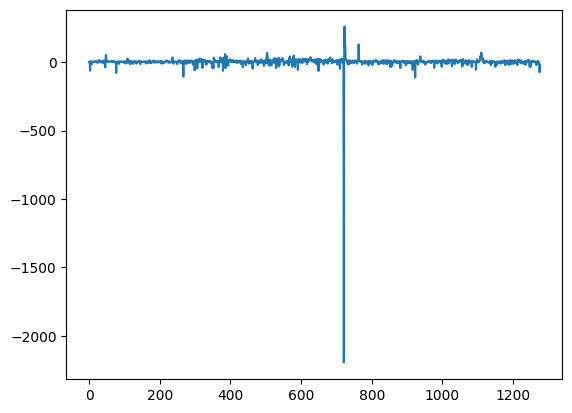

In [36]:
plt.plot(com[inputs]['total_lmp_da'] - com[inputs]['total_lmp_rt'])
# LOOk into x axis 

In [37]:
## NOTES 
## git repo and west node hub

In [38]:
def total_lmp_delta(data : pd.DataFrame) -> None: 
    data['total_lmp_delta']  = 0
    for  i in list(data.index):
        data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]

In [39]:
total_lmp_delta(com)


C:\Users\ekkoi\AppData\Local\Temp\ipykernel_8200\2996727238.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.40087600000000023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "total_lmp_delta"] = data.loc[i, "total_lmp_da"] - data.loc[i, "total_lmp_rt"]


In [40]:
def addTarget(df : pd.DataFrame)->None:
    num = len(df['total_lmp_da'])
    top_5_percent_index = num * 0.95
    bottom_95_percent_index = num * 0.05

    min_5 = sorted(df['total_lmp_delta'])[:int(bottom_95_percent_index)][-1]
    max_5 = sorted(df['total_lmp_delta'])[int(top_5_percent_index):][0]

    print("Min value:", min_5)
    print("Max value:",max_5)

    df['target_c'] = 0

    # Can also just classify outliers as 1, instead of separating into positive and negative
    for i in list(reversed(df.index)):

        if df['total_lmp_delta'][i] <= min_5:
            df.loc[i,'target_c'] = 2
        elif df['total_lmp_delta'][i] >= max_5:
            df.loc[i,'target_c'] = 1
        else: 
            df.loc[i,'target_c'] = 0

    df['target_c'] = df['target_c'].shift(-1)
    df['target_r'] = df['total_lmp_delta'].shift(-1)
    df.dropna(inplace=True)

In [41]:
addTarget(com)

Min value: -20.816823
Max value: 21.664135


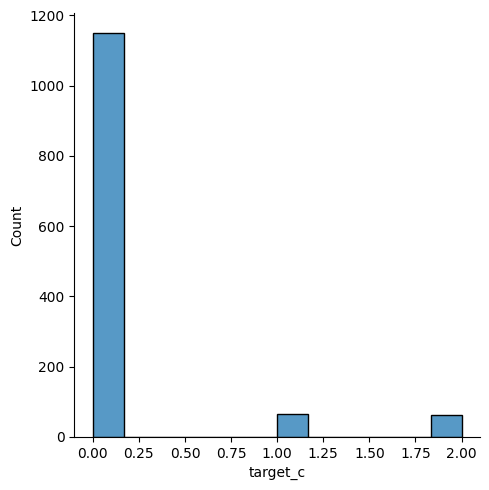

In [42]:
sns.displot(com['target_c'])

In [43]:
'''
On aprl the first, predict the delta between real time and ahead on april the second 
Inputs of april 1 
Outputs: total lmp delta of april 2 and whether it is an outlier or not 
'''

'\nOn aprl the first, predict the delta between real time and ahead on april the second \nInputs of april 1 \nOutputs: total lmp delta of april 2 and whether it is an outlier or not \n'

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
'''
# Scale the data from -1 to 1 
# 
'''

'\n# Scale the data from -1 to 1 \n# \n'

In [46]:
inputs = (com.describe().columns[:-2])

outputs = (com.describe().columns[-2:])

In [47]:
com[inputs]

,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,temperature_2m (°C),apparent_temperature (°C),...,rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),total_lmp_delta
0,21.626667,21.611831,0.000000,-0.014836,22.16,22.012707,0.132916,-0.280209,5.1,1.7,...,0.0,0.0,0.0,1019.2,1004.1,8.8,20.5,6.7,0.490,0.400876
1,25.138333,24.746787,0.000000,-0.391546,22.39,22.349999,0.171041,-0.211042,4.0,0.7,...,0.0,0.0,0.0,1020.6,1005.4,8.7,10.8,7.9,0.451,-2.396788
2,27.120833,26.925954,0.158811,-0.353690,23.22,23.167602,0.357603,-0.410001,10.9,8.2,...,0.0,0.0,0.0,1015.3,1000.5,10.5,18.0,11.6,0.412,-3.758352
3,75.469167,88.866427,14.453852,-1.056592,24.72,25.289997,0.727498,-0.157501,11.8,9.1,...,0.0,0.0,0.0,1020.1,1005.3,9.1,15.5,12.9,0.398,-63.576430
4,24.405833,25.837503,1.732547,-0.300878,32.01,33.372599,1.551454,-0.188855,10.3,6.7,...,0.0,0.0,0.0,1018.8,1003.9,11.4,20.2,12.0,0.383,7.535096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,30.170000,30.095953,0.367786,-0.441833,37.55,37.734996,0.539165,-0.354169,31.8,34.7,...,0.0,0.0,0.0,1010.3,996.6,8.1,16.2,32.8,0.280,7.639043
1272,33.821667,33.829902,0.108585,-0.100349,35.98,34.951765,-0.116254,-0.911981,29.8,37.5,...,0.0,0.0,0.0,1009.4,995.6,1.8,9.0,31.4,0.294,1.121863
1273,32.400833,37.743684,5.370952,-0.028101,31.70,33.697703,1.681246,0.316457,28.8,31.8,...,0.0,0.0,0.0,1008.9,995.1,7.3,18.4,31.3,0.296,-4.045981
1274,38.115833,39.080752,1.330033,-0.365114,33.01,34.218641,1.059685,0.148956,31.6,34.1,...,0.0,0.0,0.0,1008.1,994.4,11.0,22.7,32.5,0.292,-4.862111


<Axes: >

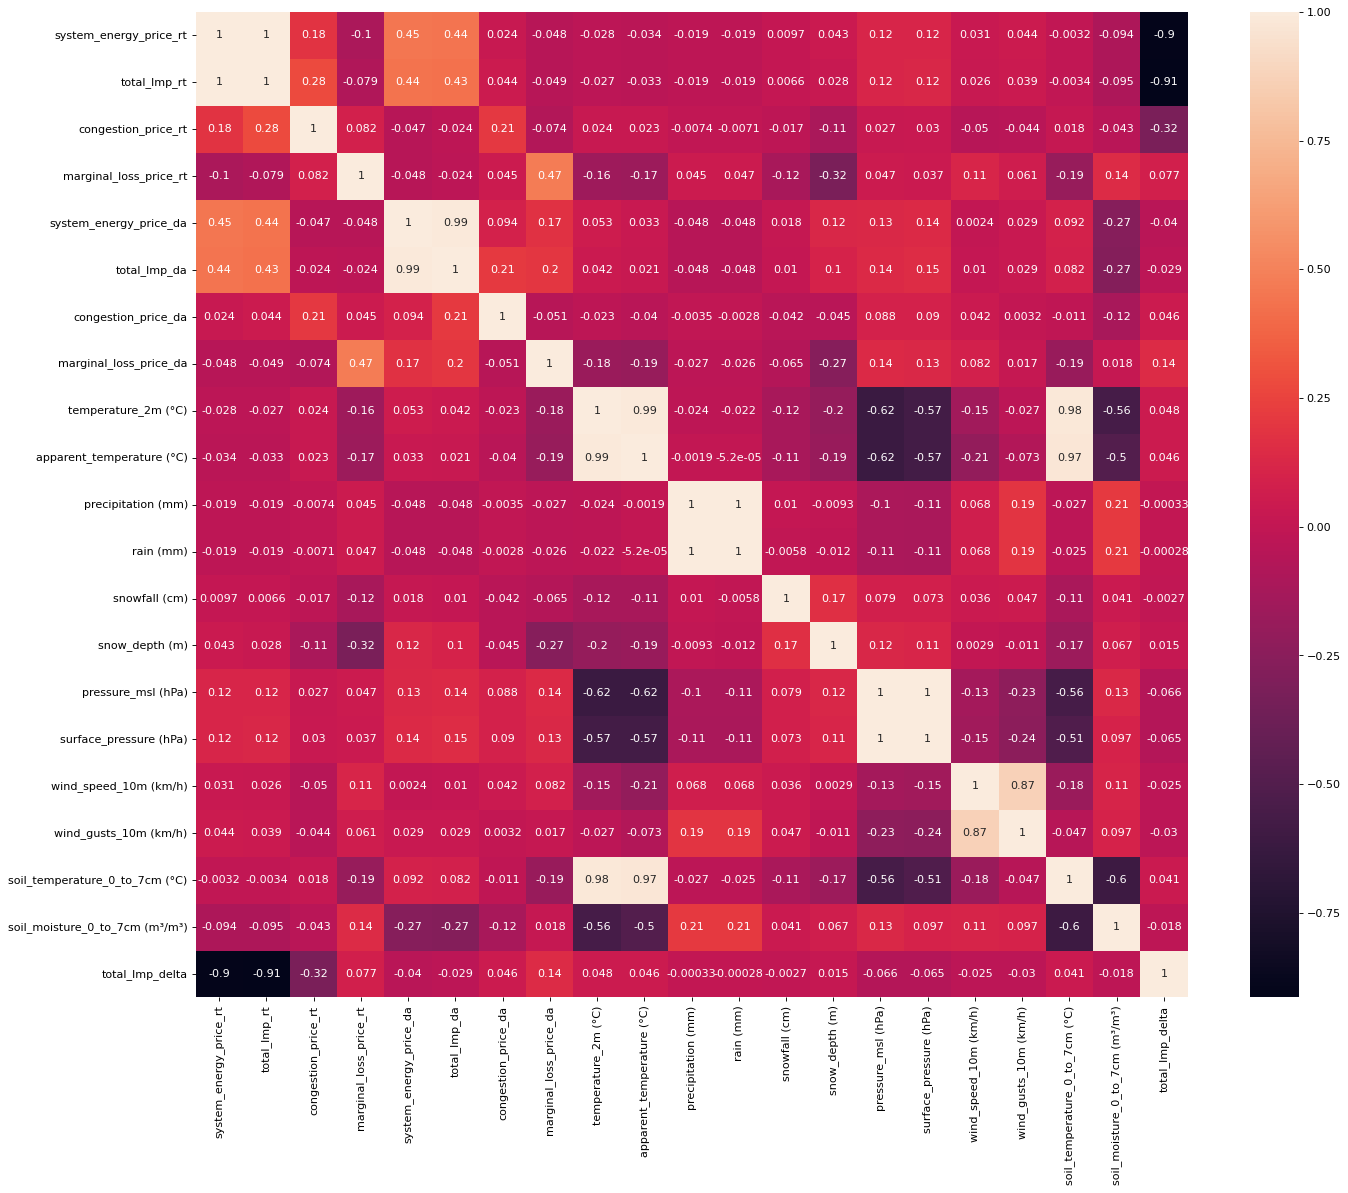

In [48]:
# Some obvious correlation between realtime and day ahead prices. 
'''
Normal Correlation:
    x realtime <-> x day ahead
Serious Correlation:
    system_energy_price_rt <-> total_lmp_rt
    congestion_price_rt <-> total_lmp_rt
'''
# Consider dropping total_lmp_rt as total_lmp_rt =  system_energy_price_rt + congestion_price_rt + marginal_loss_price_rt
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(com[inputs].corr(), annot=True)

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(com[inputs])

StandardScaler()

In [51]:
X = scaler.transform(com[inputs])

In [52]:
X

array([[-0.36883481, -0.37842201, -0.17520566, ..., -1.64367885,
         1.4649109 , -0.01122124],
       [-0.31809415, -0.33407866, -0.17520566, ..., -1.50573339,
         1.01592082, -0.05506758],
       [-0.28944867, -0.30325476, -0.15174666, ..., -1.08040157,
         0.56693073, -0.07640668],
       ...,
       [-0.21315706, -0.15024006,  0.61817237, ...,  1.184203  ,
        -0.76852696, -0.08091454],
       [-0.13058005, -0.13132749,  0.02126211, ...,  1.32214846,
        -0.81457722, -0.09370532],
       [ 0.80496759,  0.93169815,  1.27798266, ...,  1.35663482,
        -0.87214005, -1.17820773]])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,com[outputs]["target_c"],test_size=0.2, shuffle=False)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, com[outputs]['target_r'], test_size=0.2, shuffle=False)

In [55]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (1020, 21)
X_test: (256, 21)
y_train: (1020,)
y_test: (256,)


In [ ]:
print("X_train:",X_train_r.shape)
print("X_test:",X_test_r.shape)
print("y_train:",y_train_r.shape)
print("y_test:",y_test_r.shape)

X_train: (1020, 21)
X_test: (256, 21)
y_train: (1020,)
y_test: (256,)


In [ ]:
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Add confusion matrix to results 
from sklearn.metrics import confusion_matrix, mean_squared_error

In [ ]:
'''
Neg: Negative: 0 : Not an outlier
Neu: Neutral : 1 : Postive outlier
Pos: Positive : 2 : Negatve outlier 

                    Predicted
                Neg     Neu     Pos
                
        Neg    NegNeg  NegNeu  NegPos
Actual  Neu    NeuNeg  NeuNeu  NeuPos
        Pos    PosNeg  PosNeu  PosPos

            


'''

'\nNeg: Negative: 0 : Not an outlier\nNeu: Neutral : 1 : Postive outlier\nPos: Positive : 2 : Negatve outlier \n\n                    Predicted\n                Neg     Neu     Pos\n                \n        Neg    NegNeg  NegNeu  NegPos\nActual  Neu    NeuNeg  NeuNeu  NeuPos\n        Pos    PosNeg  PosNeu  PosPos\n\n            \n\n\n'

In [ ]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
print("Training", lor.score(X_train,y_train))
print("Testing: ",lor.score(X_test,y_test))
print()
print(confusion_matrix(y_test, lor.predict(X_test)))


Training 0.9130434782608695
Testing:  1.0

[[6]]


c:\Users\ekkoi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training", rfc.score(X_train,y_train))
print("Testing: ",rfc.score(X_test,y_test))
print()
print(confusion_matrix(y_test, rfc.predict(X_test)))



Training 1.0
Testing:  1.0

[[6]]


c:\Users\ekkoi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)
print("Training", dfc.score(X_train,y_train))
print("Testing: ",dfc.score(X_test,y_test))
print()
print(confusion_matrix(y_test,dfc.predict(X_test)))


Training 1.0
Testing:  1.0

[[6]]


c:\Users\ekkoi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
print("Training", svc.score(X_train,y_train))
print("Testing: ",svc.score(X_test,y_test))
print()
print(confusion_matrix(y_test, svc.predict(X_test)))

Training 0.9130434782608695
Testing:  1.0

[[6]]


c:\Users\ekkoi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)
print("Training", knc.score(X_train,y_train))
print("Testing: ",knc.score(X_test,y_test))
print()
print(confusion_matrix(y_test, knc.predict(X_test)))

Training 0.8695652173913043
Testing:  1.0

[[6]]


c:\Users\ekkoi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Score uses R^2 
rlr = Ridge()
rlr.fit(X_train_r, y_train_r)
print("Training",rlr.score(X_train_r,y_train_r))
print("Testing",rlr.score(X_test_r,y_test_r))
print()
print(mean_squared_error(y_test_r, rlr.predict(X_test_r)))

Training 0.530886493785984
Testing -1.0365159503447408

52.10060720272708


In [ ]:
svm = SVR()
svm.fit(X_train_r, y_train_r)
print("Training",svm.score(X_train_r, y_train_r))
print("Testing",svm.score(X_test_r, y_test_r))
print()
print(mean_squared_error(y_test_r, svm.predict(X_test_r)))

Training -0.08748273840706178
Testing -0.12772799578545202

28.850897696131682


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_r, y_train_r)
print("Training",dtr.score(X_train_r,y_train_r))
print("Testing",dtr.score(X_test_r,y_test_r))
print()
print(mean_squared_error(y_test_r, dtr.predict(X_test_r)))

Training 1.0
Testing -11.184385705229166

311.71565021487146


In [ ]:
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
print("Training",lr.score(X_train_r,y_train_r))
print("Testing",lr.score(X_test_r,y_test_r))
print()
print(mean_squared_error(y_test_r, lr.predict(X_test_r)))

Training 0.5877342177827164
Testing -1.5276142891941151

64.66447720137441


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train_r, y_train_r)
print("Training",rfr.score(X_train_r,y_train_r))
print("Testing",rfr.score(X_test_r,y_test_r))
print()
print(mean_squared_error(y_test_r, rfr.predict(X_test_r)))

Training 0.8683187622063878
Testing -0.8109112035507735

46.328914477318555


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.2


In [ ]:
X_train.shape[1]

9

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3) # 0, 1, 2 
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(X_train, y_train, epochs=50)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0435 - loss: 1.5384
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1304 - loss: 1.4042
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0435 - loss: 1.3362
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2609 - loss: 1.2323
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1304 - loss: 1.1623
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3478 - loss: 1.1137
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5217 - loss: 1.0176
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6522 - loss: 0.9634
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6522 - loss: 0.9353
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6957 - loss: 0.8677
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7826 - loss: 0.7987
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8696 - loss: 0.7850
Epo

In [ ]:
"""
Weather data websites 
historical weather data (At least 24h ahead)
"""

'\nWeather data websites \nhistorical weather data (At least 24h ahead)\n'

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

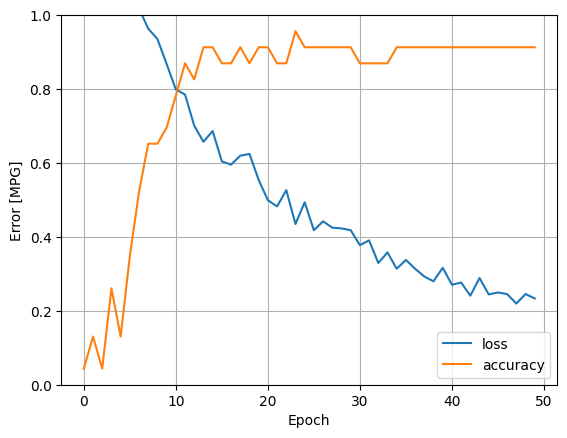

In [ ]:
plot_loss(history)

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=2)


1/1 - 0s - 431ms/step - accuracy: 1.0000 - loss: 0.1269


In [ ]:
test_results

[0.12686596810817719, 1.0]

In [ ]:
y_test

54132    0.0
46356    0.0
38580    0.0
30804    0.0
23028    0.0
15252    0.0
Name: target_c, dtype: float64

In [ ]:
model(X_test)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[ 1.7734747 , -1.2285737 , -1.591021  ],
       [ 0.8738899 , -0.3777194 , -1.4793272 ],
       [ 1.6526587 , -0.71930313, -1.4111181 ],
       [ 1.402297  , -0.90371966, -1.8353146 ],
       [ 1.6974328 , -1.4075985 , -1.2047763 ],
       [ 4.1117015 , -3.0778973 , -3.5237334 ]], dtype=float32)>

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
y_test[105:115]

Series([], Name: target_c, dtype: float64)

In [ ]:
[print(i) for i in probability_model(X_test[105:115])]

[]

In [ ]:
model_r = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError(
    reduction="sum_over_batch_size", name="mean_squared_error"
)


In [ ]:
model_r.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [ ]:
history = model_r.fit(X_train, y_train, epochs=50)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8261 - loss: 0.5086
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8696 - loss: 0.2346
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8696 - loss: 0.3296
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9130 - loss: 0.2544
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7826 - loss: 0.1987
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8696 - loss: 0.2827
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8261 - loss: 0.1941
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9130 - loss: 0.1514
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8696 - loss: 0.1403
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7826 - loss: 0.1770
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8261 - loss: 0.1237
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9130 - loss: 0.1064
Epo

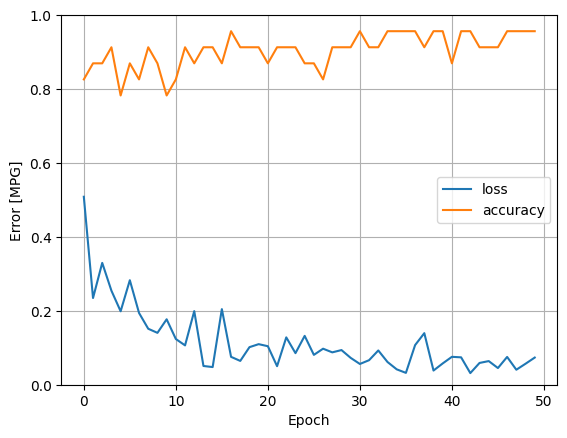

In [ ]:
plot_loss(history)